In [1]:
import numpy as np 
from sklearn.decomposition import PCA
import umap
import matplotlib.pyplot as plt

In [17]:
# Generate Data clear difference fixed length equal distribution

residues_A = [0, 1, 2]
residues_B = [2, 3, 4]
data_A = np.random.choice(residues_A, size = (10000,100), p=[1/3, 1/3, 1/3])
data_B = np.random.choice(residues_B, size = (10000,100), p=[1/3, 1/3, 1/3])

In [2]:
# Generate Data with "bi-grams difference"
residues = [0, 1, 2, 3, 4]
data_A = np.random.choice(residues, size = (10000,100), p=[2/5, 1/5, 1/5, 1/10, 1/10])
data_B = np.random.choice(residues, size = (10000,100), p=[1/10, 1/10, 1/5, 1/5, 2/5])

In [7]:
import tensorflow as tf
import utils.preprocessing as pre
bin_seqs_A = np.array([pre.synt2binary(data_A[i,:]) for i in range(10000)])
W_A = np.ones_like(data_A)
dataset_train = tf.data.Dataset.from_tensor_slices((data_A, bin_seqs_A, W_A))

In [13]:
count = 3
for i, data in enumerate(dataset_train):
    if i > count:
        break
    print(data[1].numpy())

[[0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0.

In [27]:
word_length =1
list_of_ngrams = []
for k in range(data_A.shape[0]):
    for ofset in range(word_length):
        list_of_ngrams += [ str(data_A[k,i+ofset:i+word_length+ofset]) for i in range(0,100-word_length-ofset,word_length)]

for k in range(data_B.shape[0]):
    for ofset in range(word_length):
        list_of_ngrams += [ str(data_B[k,i+ofset:i+word_length+ofset]) for i in range(0,100-word_length-ofset,word_length)]

s = set(list_of_ngrams)

dict_index = {key: i for i, key in enumerate(s)}

In [28]:
print(s)

{'[0]', '[3]', '[1]', '[2]', '[4]'}


In [29]:
features_A = np.zeros((10000,5**word_length), dtype = np.float32)
features_B = np.zeros((10000,5**word_length), dtype = np.float32)
list_of_ngrams = []
for k in range(data_A.shape[0]):
    for ofset in range(word_length):
        list_of_ngrams = [ str(data_A[k,i+ofset:i+word_length+ofset]) for i in range(0,100-word_length-ofset,word_length)]
    for key in list_of_ngrams:
        features_A[k,dict_index[key]]+=0.01

for k in range(data_B.shape[0]):
    for ofset in range(word_length):
        list_of_ngrams = [ str(data_B[k,i+ofset:i+word_length+ofset]) for i in range(0,100-word_length-ofset,word_length)]
    for key in list_of_ngrams:
        features_B[k,dict_index[key]]+=0.01
    
    
 

[0.904425   0.03761318]


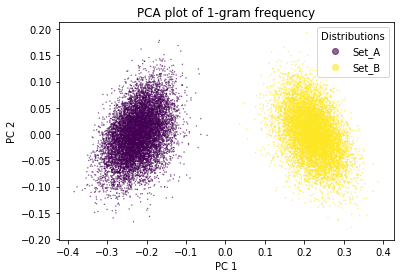

In [30]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X= np.concatenate((features_A, features_B))
pca.fit(X)
X_pca = pca.transform(X)
print(pca.explained_variance_ratio_)
import matplotlib.pyplot as plt
y = np.ones((20000,))
y[10000:] = 2

scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, s = 0.1)

plt.title('PCA plot of {}-gram frequency'.format(word_length))
handles, labels = scatter.legend_elements(prop="colors", alpha=0.6)
legend2 = plt.legend(handles, ['Set_A', 'Set_B'], loc="upper right", title="Distributions")
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.show()

In [31]:
data_B[0,:]

array([3, 2, 0, 4, 4, 4, 4, 2, 4, 2, 3, 3, 3, 4, 4, 4, 1, 0, 4, 1, 2, 2,
       4, 1, 1, 0, 4, 1, 4, 4, 4, 4, 0, 3, 1, 2, 4, 2, 2, 4, 1, 4, 2, 4,
       4, 4, 2, 0, 2, 3, 2, 4, 4, 3, 4, 2, 4, 1, 4, 4, 4, 4, 0, 3, 2, 3,
       0, 2, 3, 4, 3, 2, 0, 3, 1, 3, 4, 2, 4, 3, 3, 3, 1, 3, 3, 4, 4, 4,
       4, 4, 1, 0, 3, 0, 0, 4, 2, 4, 2, 0])